# Stimulus Figures

In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [24]:
font_size = 14
hatches = ['\\\\', '//','||','+','x','\\','/','o','O','-','.','|']
line_markers = ['o', 's', '^','v']
io_color = '#91ACDF'
comp_color = '#98A255'
read_color = '#98A255'
write_color = '#E77D8D'
read_color = '#C69156'
other_colors = ['#F5871F','#5A5B5D','#B6D442','#FCFB47','#111F71']
dpi = 2000
marker_size = 7
bar_width = .35
save_dir = "./stimulus/"

In [25]:
procs=[512,1024,2048,4096,8192]
computation=[216,108,54,27,13.5]
ideal_comp=computation
io=[1830,1189.5,773.175,502.56375,326.6664375]
ideal_io=[1744,872,436,218,69]
data = {'procs': procs, 'computation': computation, 'ideal_comp': ideal_comp, 'io':io, 'ideal_io':ideal_io}
df = pd.DataFrame(data)

In [26]:
%matplotlib inline
df['total'] = df['computation'] + df['io']
df['total_ideal'] = df['ideal_comp'] + df['ideal_io']

In [27]:
df['total_err'] = df['total'] * 0.023
df['io_err'] = df['io'] * 0.023
df['computation_err'] = df['computation'] * 0.053

In [28]:
print(df)

   procs  computation  ideal_comp           io  ideal_io        total  \
0    512        216.0       216.0  1830.000000      1744  2046.000000   
1   1024        108.0       108.0  1189.500000       872  1297.500000   
2   2048         54.0        54.0   773.175000       436   827.175000   
3   4096         27.0        27.0   502.563750       218   529.563750   
4   8192         13.5        13.5   326.666437        69   340.166437   

   total_ideal  total_err     io_err  computation_err  
0       1960.0  47.058000  42.090000          11.4480  
1        980.0  29.842500  27.358500           5.7240  
2        490.0  19.025025  17.783025           2.8620  
3        245.0  12.179966  11.558966           1.4310  
4         82.5   7.823828   7.513328           0.7155  


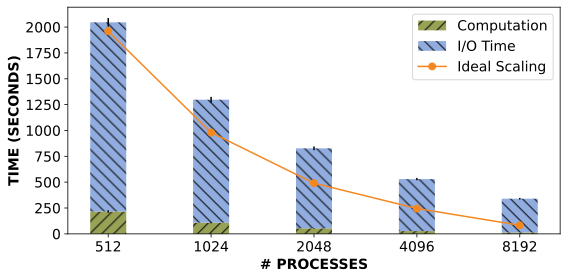

In [29]:
#Plot 1 - background - "total" (top) series
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(8,4))
comp_plot = plt.bar(df['procs'].astype(str), df['computation'], yerr=df['computation_err'], width=bar_width, color=comp_color, hatch=hatches[1])
io_plot = plt.bar(df['procs'].astype(str), df['io'], yerr=df['io_err'], bottom=df['computation'], width=bar_width, color=io_color, hatch=hatches[0])
ideal_plot = plt.plot(df['procs'].astype(str), df['total_ideal'], color=other_colors[0], marker=line_markers[0], markersize=marker_size)

#legend
# topbar = plt.Rectangle((0,0),1,1,fc=io_color, hatch=hatches[0])
# bottombar = plt.Rectangle((0,0),1,1,fc=comp_color, hatch=hatches[1])
# l = plt.legend([bottombar, topbar], ['Computation', 'I/O Time'], loc=1, ncol = 1, prop={'size':font_size})
# l.draw_frame(False)

plt.legend((comp_plot[0], io_plot[0], ideal_plot[0]), ("Computation", "I/O Time", "Ideal Scaling"), fontsize=font_size)

#Optional code - Make plot look nicer
plt.ylabel("TIME (SECONDS)", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xlabel("# PROCESSES", fontdict=dict(weight='bold'), fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# #Set fonts to consistent 16pt size
# for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#              bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#     item.set_fontsize(font_size)
plt.tight_layout()
plt.savefig(save_dir + "motivation.pdf", format='pdf',dpi=dpi)

In [31]:
!pdfcrop "{save_dir}motivation.pdf"

/bin/bash: /home/hdevarajan/install/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `./stimulus/motivation-crop.pdf'.


## Anatomy

In [32]:
labels = ['HDF5Dataset', 'interleave (resize)', 'map (zoom)', 'filter', 'shuffle', 'batch', 'prefetch', 'Iteration']
values = [0.682666667,0.316923077,0.307692308,0.158461538,0.153846154,0.02403846,0.682666667,0.02884615]
data = {'labels': labels, 'values': values}
df = pd.DataFrame(data)
df["percentage"] = df["values"] *100 / df["values"].sum()
df["percentage"] = df["percentage"].round(1)
df["concat"] = df["labels"] + " " + df["percentage"].astype(str) + "%"
print(df)

                labels    values  percentage                     concat
0          HDF5Dataset  0.682667        29.0          HDF5Dataset 29.0%
1  interleave (resize)  0.316923        13.5  interleave (resize) 13.5%
2           map (zoom)  0.307692        13.1           map (zoom) 13.1%
3               filter  0.158462         6.7                filter 6.7%
4              shuffle  0.153846         6.5               shuffle 6.5%
5                batch  0.024038         1.0                 batch 1.0%
6             prefetch  0.682667        29.0             prefetch 29.0%
7            Iteration  0.028846         1.2             Iteration 1.2%


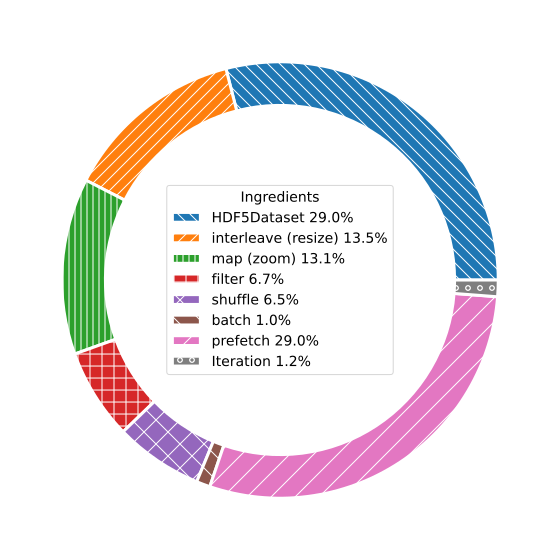

In [33]:
plt.figure(figsize=(8,8))
matplotlib.rcParams['font.size'] = font_size
pie_chart = plt.pie(df['values'], startangle=0, radius=1,wedgeprops=dict(width=0.2, edgecolor='w',linewidth=3))
for i, patch in enumerate(pie_chart[0]):
    patch.set_hatch(hatches[i])
plt.legend(pie_chart[0], df["concat"],
          title="Ingredients",
          loc="center",
          bbox_to_anchor=(.5,.5))
plt.tight_layout()
plt.savefig(save_dir + "anatomy.pdf", format='pdf',dpi=dpi)

In [34]:
!pdfcrop "{save_dir}/anatomy.pdf"

/bin/bash: /home/hdevarajan/install/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `./stimulus//anatomy-crop.pdf'.
